In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import networkx as nx
import warnings
warnings.filterwarnings(action='ignore')

In [137]:
df=pd.read_csv(r"C:\Users\datma003\Desktop\projects1\Heart Disease Prediction\heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

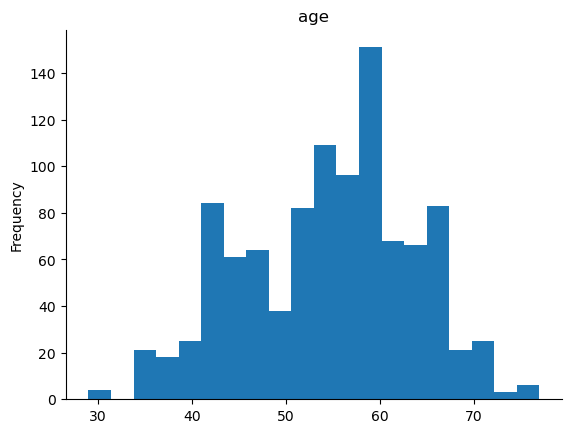

In [8]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

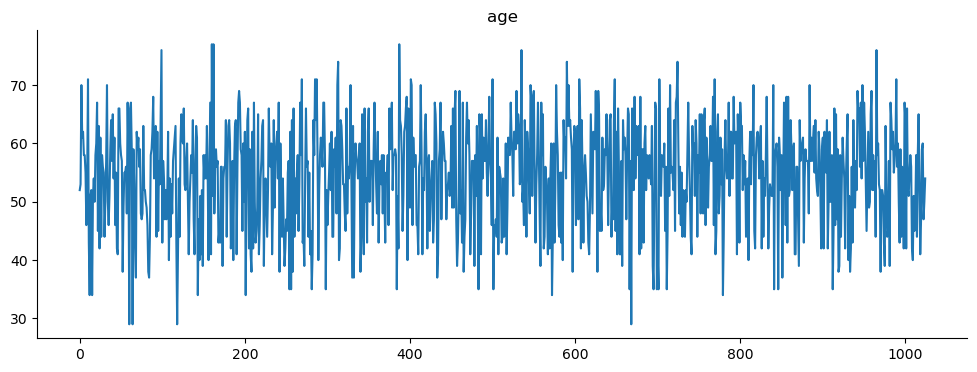

In [9]:
df['age'].plot(kind='line', figsize=(12, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

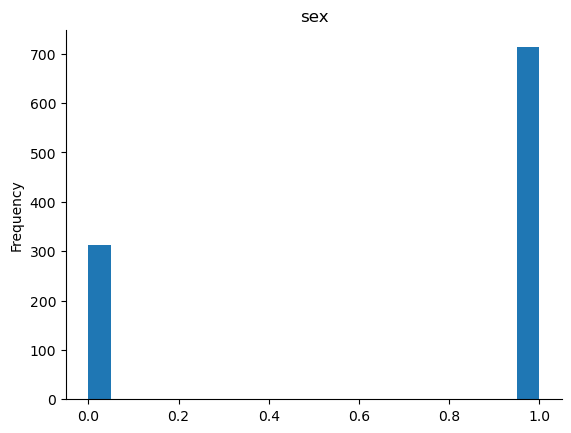

In [10]:
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

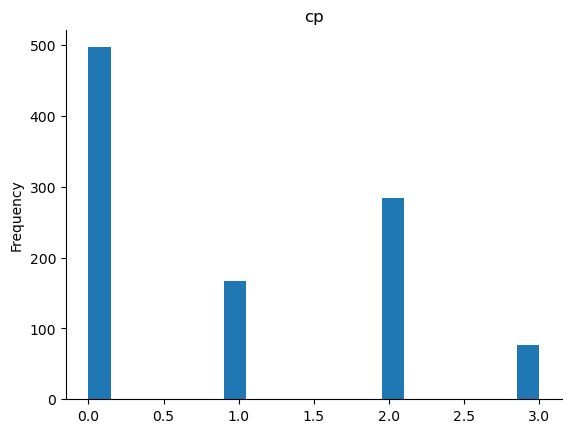

In [11]:
df['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

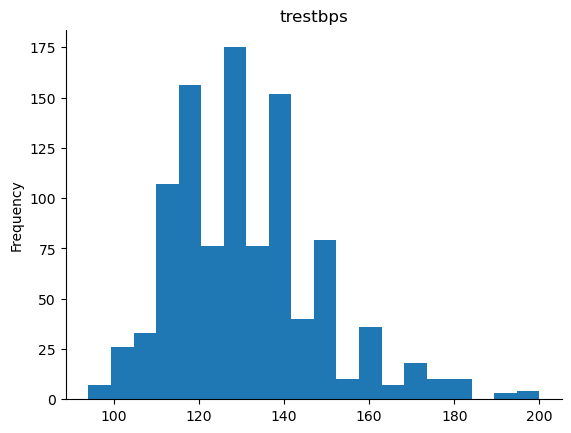

In [12]:
df['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

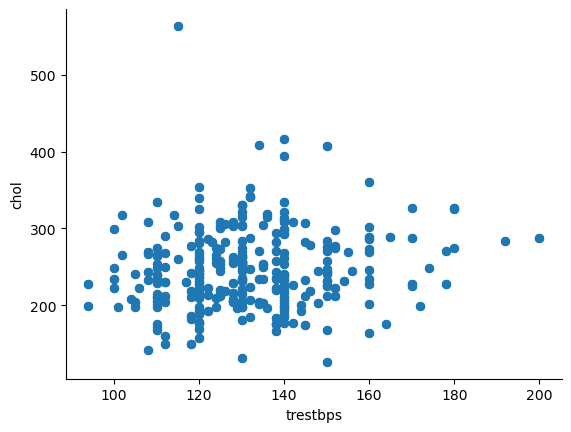

In [13]:
df.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

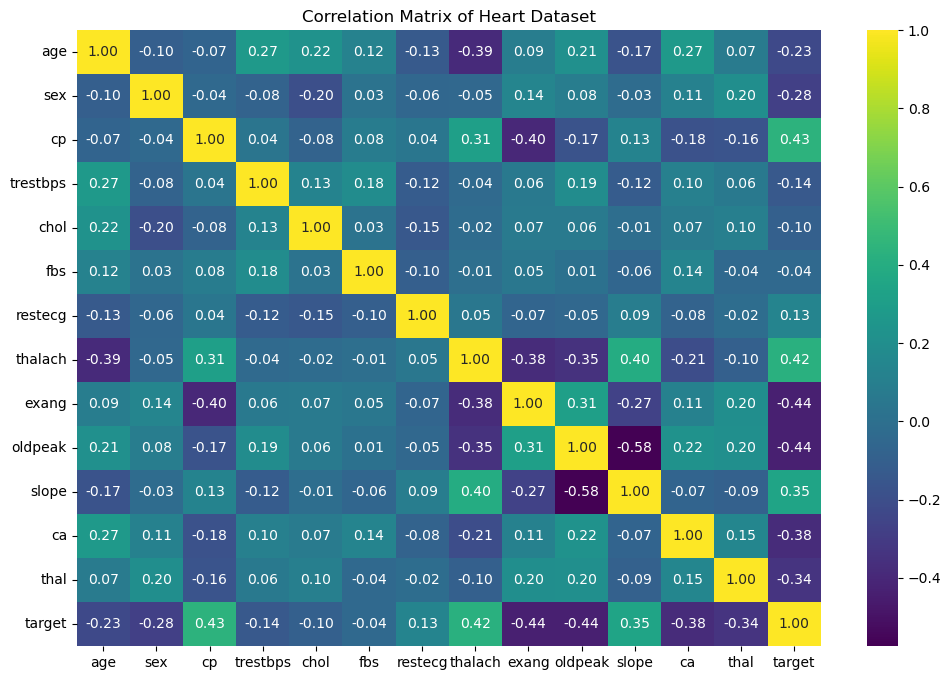

In [14]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Heart Dataset')
plt.show()

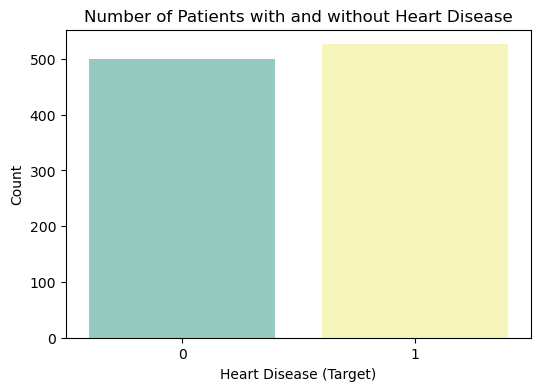

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set3')
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (Target)')
plt.ylabel('Count')
plt.show()

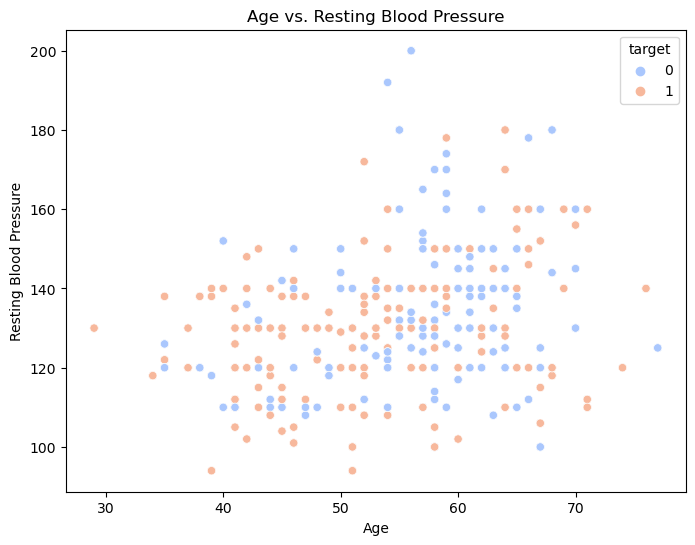

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='trestbps', data=df, hue='target', palette='coolwarm')
plt.title('Age vs. Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

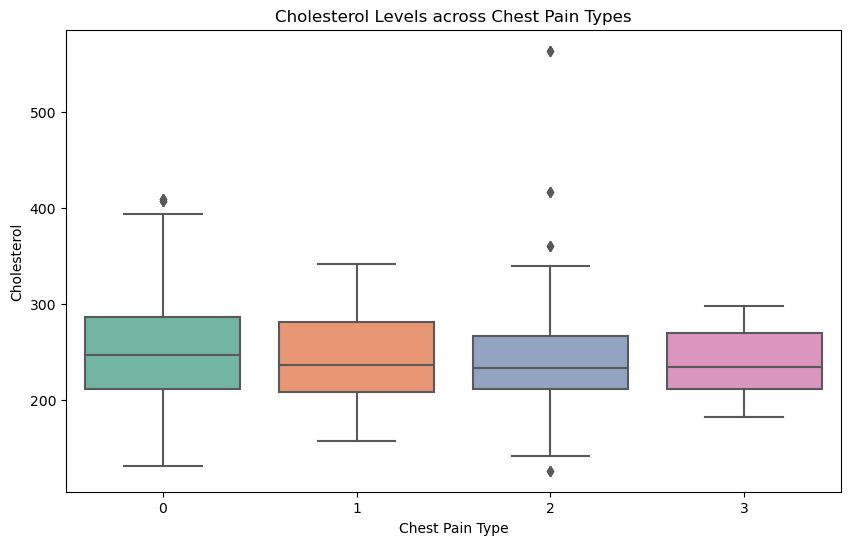

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cp', y='chol', data=df, palette='Set2')
plt.title('Cholesterol Levels across Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol')
plt.show()

C:\Users\datma003\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


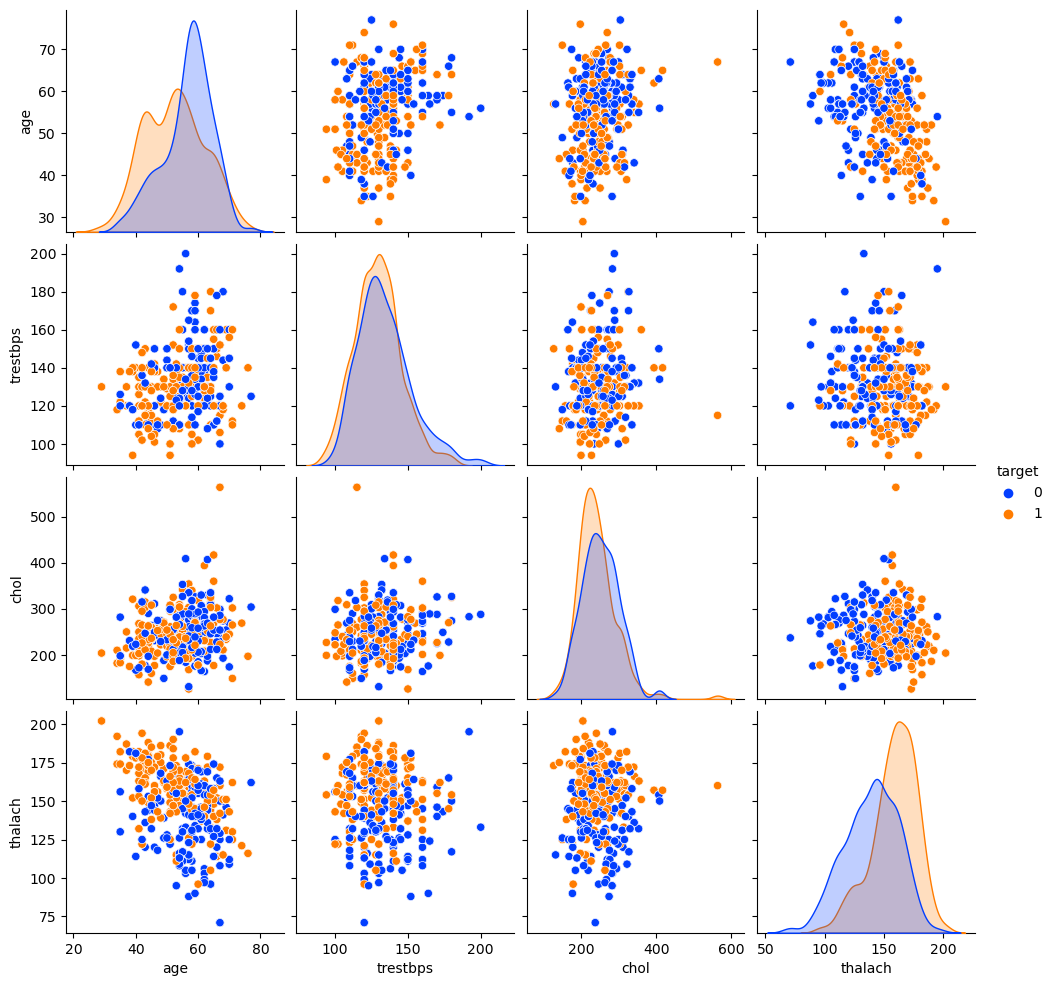

In [18]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='bright')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [21]:
sc=StandardScaler()
continuos_cols=['age','trestbps','chol','thalach','oldpeak']
df[continuos_cols]=sc.fit_transform(df[continuos_cols])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [22]:
df['chol'].min(),df['chol'].max()

(-2.3270544304215677, 6.166694240617154)

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_selection import chi2

In [24]:
def FS_KBest(df):
    col_list = []
    for col in df.columns:
        if ((df[col].dtype != 'object') & (col != 'target')):
            col_list.append(col)
        
    xx = df[col_list]
    yy = df['target']
    fs = SelectKBest(score_func=f_classif, k=8)
    
    X_selected = fs.fit_transform(xx, yy)

    l = list(xx.columns)
    for i in range(0, len(l)):
        print(f"{i} = {l[i]}")
        
    return fs.get_support(True)

FS_KBest(df)

0 = age
1 = sex
2 = cp
3 = trestbps
4 = chol
5 = fbs
6 = restecg
7 = thalach
8 = exang
9 = oldpeak
10 = slope
11 = ca
12 = thal


array([ 1,  2,  7,  8,  9, 10, 11, 12], dtype=int64)

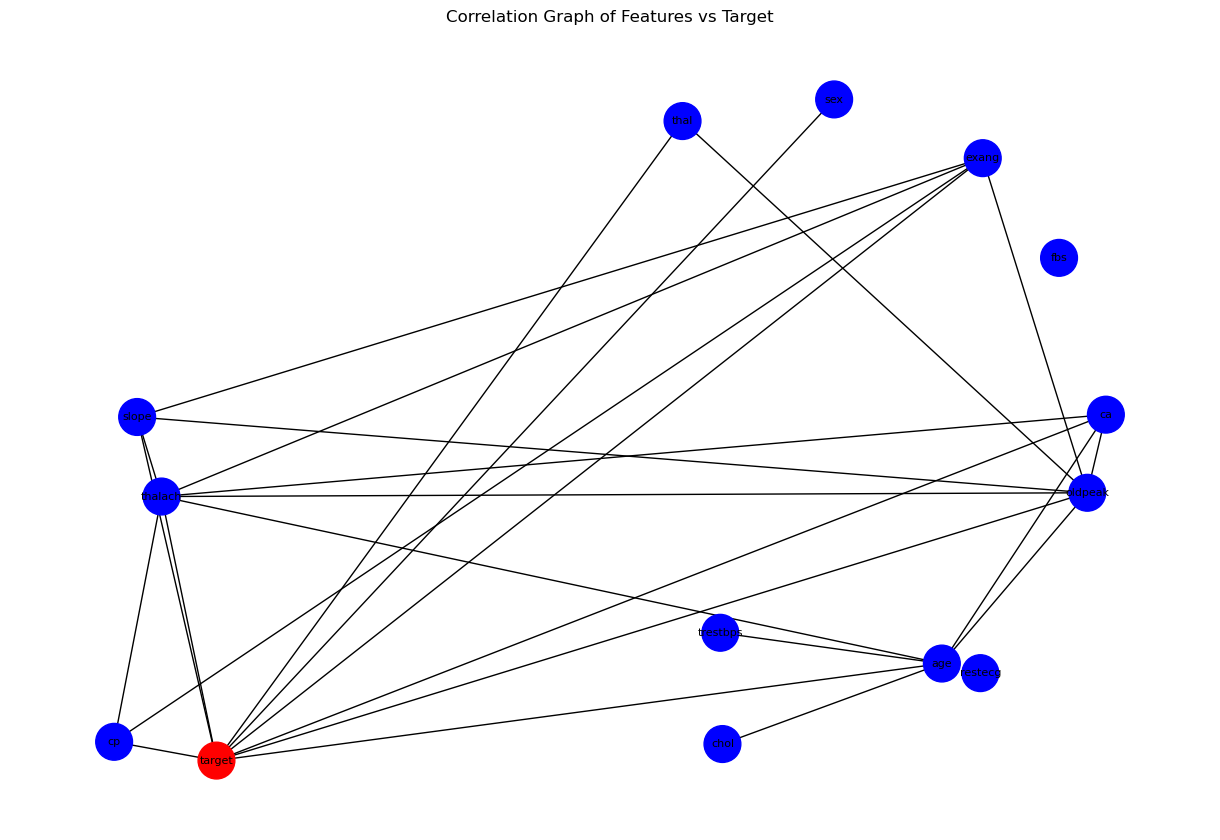

In [25]:
graph = nx.Graph()
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['target']

graph.add_nodes_from(features)
graph.add_nodes_from(target)

correlation_threshold = 0.2

for feature in features:
    correlation = df[feature].corr(df['target'])
    if abs(correlation) > correlation_threshold:
        graph.add_edge(feature, 'target', weight=correlation)

for i in range(len(features)):
    for j in range(i+1, len(features)):
        correlation = df[features[i]].corr(df[features[j]])
        if abs(correlation) > correlation_threshold:
            graph.add_edge(features[i], features[j], weight=correlation)


node_colors = ['blue'] * len(features) + ['red']
node_sizes = [abs(df[feature].corr(df['target'])) * 1000 for feature in features] + [1000]

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph) 
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=8)
plt.title("Correlation Graph of Features vs Target")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

In [27]:
X=df.drop(columns=['target'])
Y=df['target']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [29]:
lr1=LogisticRegression()
start_time=time.time()
lr1.fit(x_train,y_train)
end_time=time.time()
lrt=end_time-start_time
lr1_pred=lr1.predict(x_test)
print("Accuracy of Logistic Regression:",accuracy_score(lr1_pred,y_test))
print(classification_report(lr1_pred,y_test))

Accuracy of Logistic Regression: 0.8441558441558441
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       124
           1       0.92      0.81      0.86       184

    accuracy                           0.84       308
   macro avg       0.84      0.85      0.84       308
weighted avg       0.86      0.84      0.85       308



In [30]:
dt1=DecisionTreeClassifier()
start_time=time.time()
dt1.fit(x_train,y_train)
end_time=time.time()
dtt=end_time-start_time
dt1_pred=dt1.predict(x_test)
print("Accuracy of Decision Tree:",accuracy_score(dt1_pred,y_test))
print(classification_report(dt1_pred,y_test))

Accuracy of Decision Tree: 0.9902597402597403
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       149
           1       0.98      1.00      0.99       159

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [31]:
rf1=RandomForestClassifier()
start_time=time.time()
rf1.fit(x_train,y_train)
end_time=time.time()
rft=end_time-start_time
rf1_pred=rf1.predict(x_test)
print("Accuracy of Random Forest:",accuracy_score(rf1_pred,y_test))
print(classification_report(rf1_pred,y_test))

Accuracy of Random Forest: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      1.00      1.00       162

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



In [32]:
KNN1=KNeighborsClassifier()
start_time=time.time()
KNN1.fit(x_train,y_train)
end_time=time.time()
KNNt=end_time-start_time
KNN1_pred=KNN1.predict(x_test)
print("Accuracy of KNN:",accuracy_score(KNN1_pred,y_test))
print(classification_report(KNN1_pred,y_test))

Accuracy of KNN: 0.8409090909090909
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       143
           1       0.86      0.84      0.85       165

    accuracy                           0.84       308
   macro avg       0.84      0.84      0.84       308
weighted avg       0.84      0.84      0.84       308



In [33]:
GNB1=GaussianNB()
start_time=time.time()
GNB1.fit(x_train,y_train)
end_time=time.time()
GNBt=end_time-start_time
GNB1_pred=GNB1.predict(x_test)
print("Accuracy of GNB:",accuracy_score(GNB1_pred,y_test))
print(classification_report(GNB1_pred,y_test))

Accuracy of GNB: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       142
           1       0.85      0.83      0.84       166

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.83      0.82      0.82       308



In [34]:
svm1=SVC()
start_time=time.time()
svm1.fit(x_train,y_train)
end_time=time.time()
svmt=end_time-start_time
svm1_pred=svm1.predict(x_test)
print("Accuracy of SVM:",accuracy_score(svm1_pred,y_test))
print(classification_report(svm1_pred,y_test))

Accuracy of SVM: 0.8733766233766234
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       123
           1       0.95      0.83      0.89       185

    accuracy                           0.87       308
   macro avg       0.87      0.88      0.87       308
weighted avg       0.89      0.87      0.87       308



In [35]:
results_df={"Algorithm":['Logistic Regression',"SVM",'Decision Tree','Random Forest','KNN','GNB'],"Accuracy":[accuracy_score(lr1_pred,y_test),accuracy_score(svm1_pred,y_test),accuracy_score(dt1_pred,y_test),accuracy_score(rf1_pred,y_test),accuracy_score(KNN1_pred,y_test),accuracy_score(GNB1_pred,y_test)],   
            "Recall":[recall_score(lr1_pred,y_test),recall_score(svm1_pred,y_test),recall_score(dt1_pred,y_test),recall_score(rf1_pred,y_test),recall_score(KNN1_pred,y_test),recall_score(GNB1_pred,y_test)],
            "Precision":[precision_score(lr1_pred,y_test),precision_score(svm1_pred,y_test),precision_score(dt1_pred,y_test),precision_score(rf1_pred,y_test),precision_score(KNN1_pred,y_test),precision_score(GNB1_pred,y_test)],
           "F1-Score":[f1_score(lr1_pred,y_test),f1_score(svm1_pred,y_test),f1_score(dt1_pred,y_test),f1_score(rf1_pred,y_test),f1_score(KNN1_pred,y_test),f1_score(GNB1_pred,y_test)]}
results_df=pd.DataFrame(results_df)
results_df

,Algorithm,Accuracy,Recall,Precision,F1-Score
0,Logistic Regression,0.844156,0.809783,0.919753,0.861272
1,SVM,0.873377,0.832432,0.950617,0.887608
2,Decision Tree,0.990260,1.000000,0.981481,0.990654
3,Random Forest,1.000000,1.000000,1.000000,1.000000
4,KNN,0.840909,0.842424,0.858025,0.850153
5,GNB,0.824675,0.825301,0.845679,0.835366


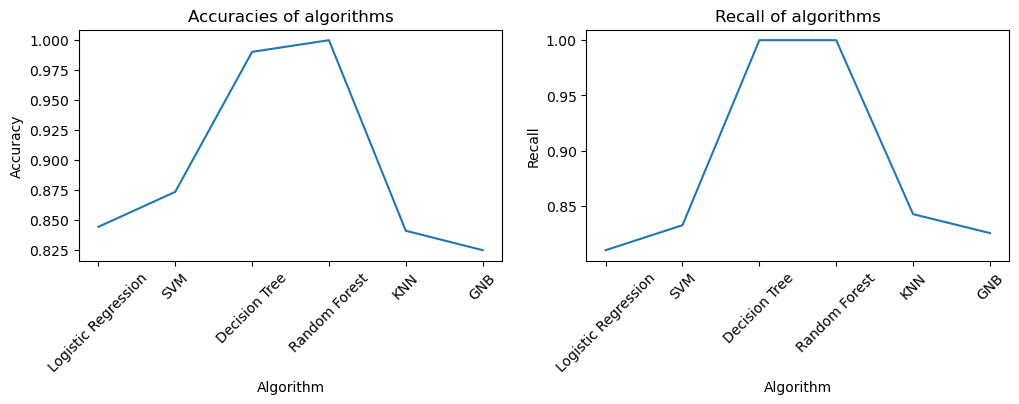

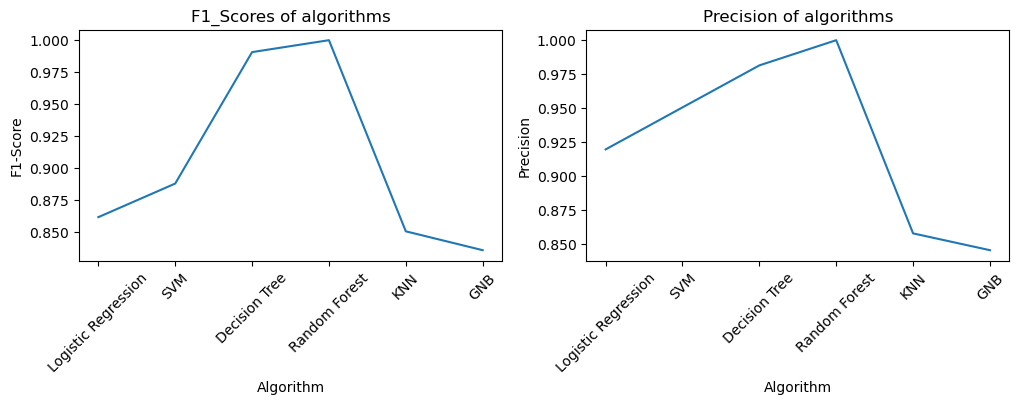

In [36]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("Accuracies of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Accuracy'])

plt.subplot(1,2,2)
plt.title("Recall of algorithms")
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Recall'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title("F1_Scores of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['F1-Score'])

plt.subplot(1,2,2)
plt.title("Precision of algorithms")
plt.xticks(rotation=45)
sns.lineplot(data=results_df,x=results_df['Algorithm'],y=results_df['Precision'])
plt.show()

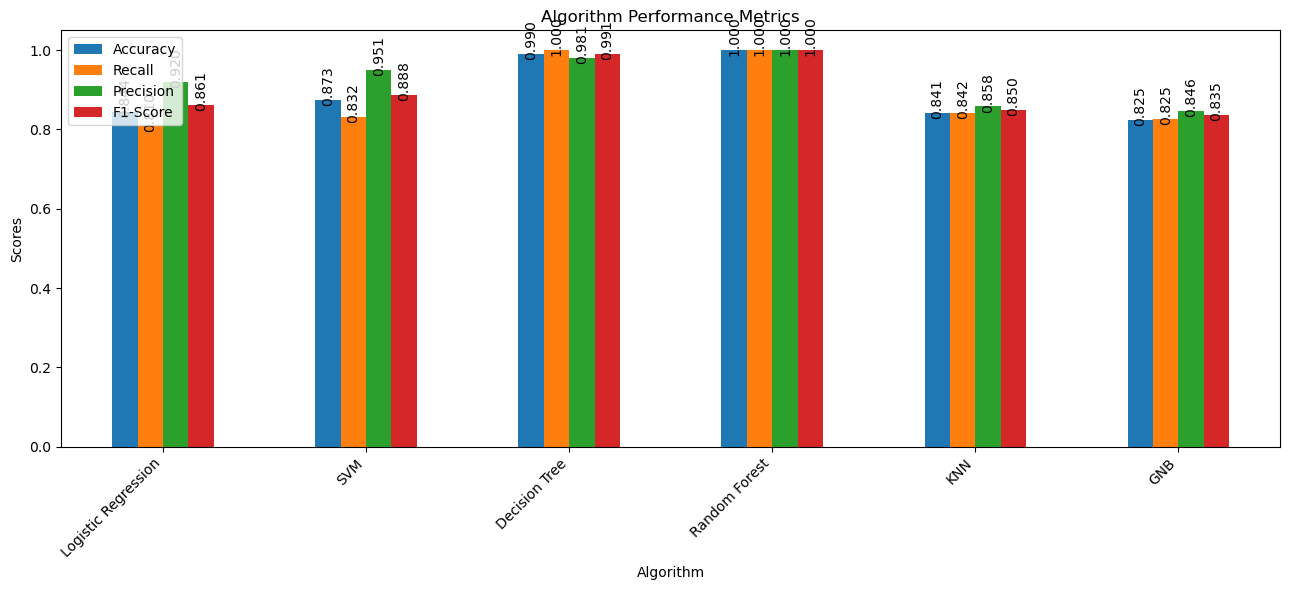

In [37]:
ax=results_df.set_index('Algorithm').plot(kind='bar', figsize=(13, 6))

plt.ylabel('Scores')
plt.title('Algorithm Performance Metrics')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=90)
    
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [38]:
print("Confusion Matrix of Logistic Regression ")
lr1_cm=pd.DataFrame(confusion_matrix(lr1_pred,y_test))
print(lr1_cm)
print("Confusion Matrix of Decision Tree ")
dt1_cm=pd.DataFrame(confusion_matrix(dt1_pred,y_test))
print(dt1_cm)
print("Confusion Matrix of Random Forest ")
rf1_cm=pd.DataFrame(confusion_matrix(rf1_pred,y_test))
print(rf1_cm)
print("Confusion Matrix of SVM ")
svm1_cm=pd.DataFrame(confusion_matrix(svm1_pred,y_test))
print(svm1_cm)
print("Confusion Matrix of KNN ")
KNN1_cm=pd.DataFrame(confusion_matrix(KNN1_pred,y_test))
print(KNN1_cm)
print("Confusion Matrix of GNB ")
GNB1_cm=pd.DataFrame(confusion_matrix(GNB1_pred,y_test))
print(GNB1_cm)

Confusion Matrix of Logistic Regression 
     0    1
0  111   13
1   35  149
Confusion Matrix of Decision Tree 
     0    1
0  146    3
1    0  159
Confusion Matrix of Random Forest 
     0    1
0  146    0
1    0  162
Confusion Matrix of SVM 
     0    1
0  115    8
1   31  154
Confusion Matrix of KNN 
     0    1
0  120   23
1   26  139
Confusion Matrix of GNB 
     0    1
0  117   25
1   29  137


In [39]:
time_df={"Algorithm":['Logistic Regression',"SVM",'Decision Tree','Random Forest','KNN','GNB'],
         "Execution Time in Seconds":[lrt,svmt,dtt,rft,KNNt,GNBt]}
time_df=pd.DataFrame(time_df)
time_df

,Algorithm,Execution Time in Seconds
0,Logistic Regression,0.016264
1,SVM,0.018066
2,Decision Tree,0.007070
3,Random Forest,0.246696
4,KNN,0.008823
5,GNB,0.005110


Text(0.5, 1.0, 'Time Taken For Model Training')

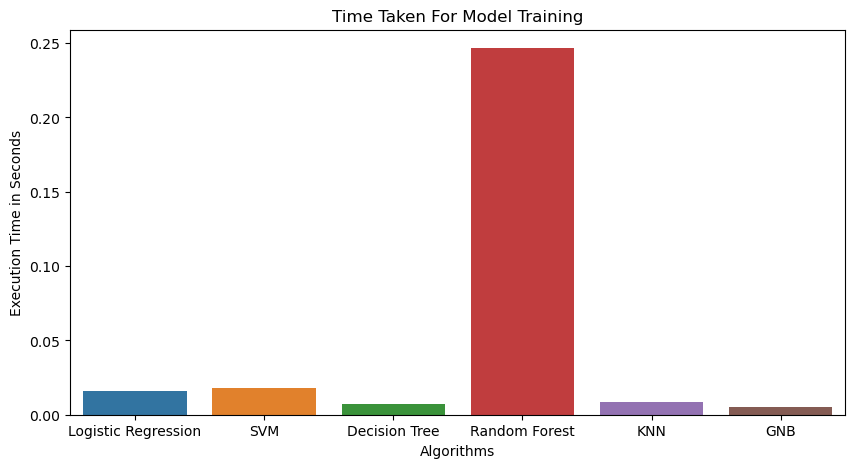

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(data=time_df,x=time_df['Algorithm'],y=time_df['Execution Time in Seconds'])
plt.xlabel("Algorithms")
plt.ylabel("Execution Time in Seconds")
plt.title("Time Taken For Model Training")

## Provide Dynamic Input and predict using the best model

In [147]:
input_list=list(df.columns)
input_list.remove('target')
test=pd.DataFrame(columns=[input_list])
inputs=[]
for i in input_list:
    if i=='sex':
        i=int(input(f"Enter {i} \n 1 if male, 0 if female"))
        inputs.append(i)
    elif i=='cp' or i=='thal':
        i=int(input(f"Enter {i} in a scale of 0-3"))
        inputs.append(i)
    elif i=='fbs' or i=='exang':
        i=int(input(f"Enter {i} \n 1 if yes, 0 if no"))
        inputs.append(i)
    elif i=='restecg' or i=='slope':
        i=int(input(f"Enter {i} in a scale of 0-2"))
        inputs.append(i)
    elif i=='ca':
        i=int(input(f"Enter {i} in a scale of 0-4"))
        inputs.append(i)
    else:
        i=int(input(f"Enter {i}"))
        inputs.append(i)
test.loc[len(test)] = inputs
test[continuos_cols]=sc.fit_transform(test[continuos_cols])
if rf1.predict(test)[0]==1:
    print("Heart Disease")
else:
    print("Healthy")

Enter age 87
Enter sex 
 1 if male, 0 if female 1
Enter cp in a scale of 0-3 2
Enter trestbps 78
Enter chol 5
Enter fbs 
 1 if yes, 0 if no 1
Enter restecg in a scale of 0-2 2
Enter thalach 74
Enter exang 
 1 if yes, 0 if no 1
Enter oldpeak 45
Enter slope in a scale of 0-2 2
Enter ca in a scale of 0-4 0
Enter thal in a scale of 0-3 3


Heart Disease


In [85]:
# pip install torch torch-geometric


Epoch 0, Loss: 0.9314, Test Accuracy: 0.4740
Epoch 10, Loss: 0.4441, Test Accuracy: 0.7792
Epoch 20, Loss: 0.3586, Test Accuracy: 0.7955
Epoch 30, Loss: 0.3205, Test Accuracy: 0.7987
Epoch 40, Loss: 0.2964, Test Accuracy: 0.8084
Epoch 50, Loss: 0.2762, Test Accuracy: 0.8377
Epoch 60, Loss: 0.2580, Test Accuracy: 0.8604
Epoch 70, Loss: 0.2395, Test Accuracy: 0.8701
Epoch 80, Loss: 0.2198, Test Accuracy: 0.8539
Epoch 90, Loss: 0.1977, Test Accuracy: 0.8636
Epoch 100, Loss: 0.1760, Test Accuracy: 0.8766
Epoch 110, Loss: 0.1562, Test Accuracy: 0.8799
Epoch 120, Loss: 0.1395, Test Accuracy: 0.8799
Epoch 130, Loss: 0.1250, Test Accuracy: 0.8831
Epoch 140, Loss: 0.1115, Test Accuracy: 0.9091
Epoch 150, Loss: 0.0996, Test Accuracy: 0.9123
Epoch 160, Loss: 0.0890, Test Accuracy: 0.9188
Epoch 170, Loss: 0.0797, Test Accuracy: 0.9188
Epoch 180, Loss: 0.0714, Test Accuracy: 0.9221
Epoch 190, Loss: 0.0639, Test Accuracy: 0.9286


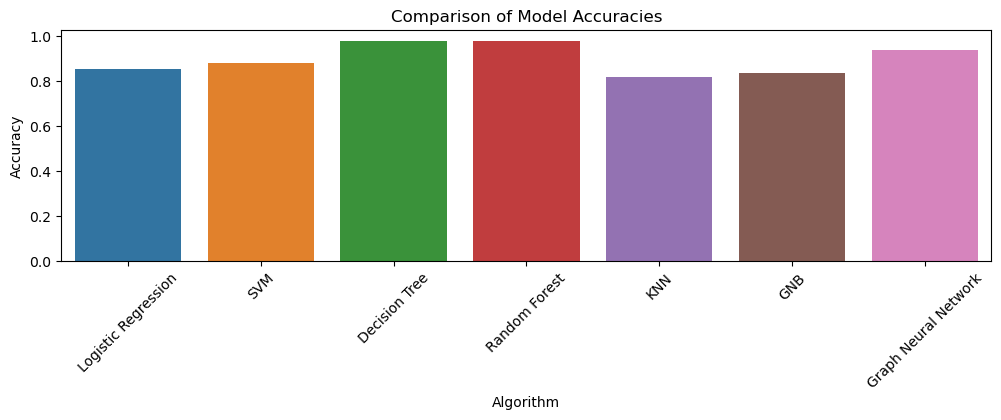

In [112]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim

# Step 1: Create a graph structure
# Using correlation matrix to create edges
correlation_matrix = df.corr()
edge_index = []
correlation_threshold = 0.2

for i in range(len(df.columns) - 1):
    for j in range(i + 1, len(df.columns) - 1):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            edge_index.append([i, j])
            edge_index.append([j, i])

# Convert edge index to a PyTorch tensor
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

# Step 2: Prepare features and target
X = df.drop(columns=['target']).values
Y = df['target'].values

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert X and Y to PyTorch tensors
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=X, edge_index=edge_index, y=Y)

# Step 3: Define GNN Model (Graph Convolutional Network)
class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Perform graph convolution and ReLU activation
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
num_node_features = X.shape[1]
num_classes = len(df['target'].unique())
hidden_channels = 16

model = GCN(num_node_features, hidden_channels, num_classes)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Split the dataset
train_mask, test_mask = train_test_split(range(X.shape[0]), test_size=0.3, random_state=42)

# Step 5: Train the GNN model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[train_mask], data.y[train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = pred[test_mask] == data.y[test_mask]
    acc = correct.sum().item() / len(correct)
    return acc

# Train the model for a number of epochs
for epoch in range(200):
    loss = train()
    if epoch % 10 == 0:
        test_acc = test()
        print(f'Epoch {epoch}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

# Step 6: Add the results to the comparison DataFrame
gnn_accuracy = test()
#results_df = results_df.append({'Algorithm': 'Graph Neural Network', 'Accuracy': gnn_accuracy}, ignore_index=True)
new_row = pd.DataFrame({'Algorithm': ['Graph Neural Network'], 'Accuracy': [gnn_accuracy]})
results_df = pd.concat([results_df, new_row], ignore_index=True)

# Step 7: Visualize the updated results
plt.figure(figsize=(12, 3))
sns.barplot(x='Algorithm', y='Accuracy', data=results_df)
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.show()


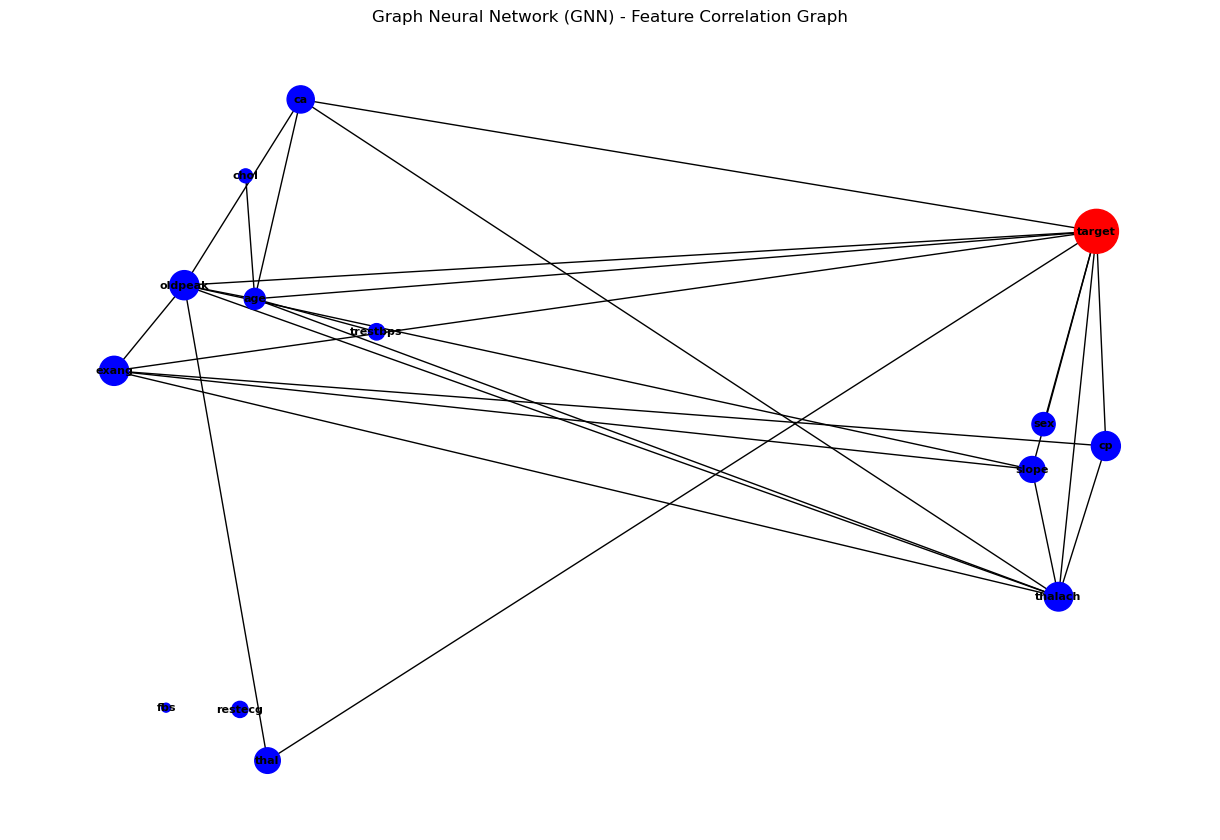

In [120]:
graph = nx.Graph()
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['target']

graph.add_nodes_from(features)
graph.add_nodes_from(target)

correlation_threshold = 0.2

# Add edges between features based on correlation threshold
for feature in features:
    correlation = df[feature].corr(df['target'])
    if abs(correlation) > correlation_threshold:
        graph.add_edge(feature, 'target', weight=correlation)

# Add edges between features themselves if they are strongly correlated
for i in range(len(features)):
    for j in range(i+1, len(features)):
        correlation = df[features[i]].corr(df[features[j]])
        if abs(correlation) > correlation_threshold:
            graph.add_edge(features[i], features[j], weight=correlation)

# Visualize the graph
plt.figure(figsize=(12, 8))

# Set node color: Features (blue), Target (red)
node_colors = ['blue'] * len(features) + ['red']

# Set node sizes based on their correlation to the target
node_sizes = [abs(df[feature].corr(df['target'])) * 1000 for feature in features] + [1000]

# Define layout for better visualization
pos = nx.spring_layout(graph)

# Draw the graph with labels, colors, and sizes
nx.draw(graph, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=8, font_weight='bold')

plt.title("Graph Neural Network (GNN) - Feature Correlation Graph")
plt.show()
